In [1]:
cd D:\Python\Imagenes_landsat\Imagen-bofedales

D:\Python\Imagenes_landsat\Imagen-bofedales


In [2]:
ls

 El volumen de la unidad D es Datos
 El n£mero de serie del volumen es: B012-2E11

 Directorio de D:\Python\Imagenes_landsat\Imagen-bofedales

30/03/2017  10:01 p. m.    <DIR>          .
30/03/2017  10:01 p. m.    <DIR>          ..
08/07/2016  06:37 p. m.       118,355,598 LC80060692016185LGN00_B1.TIF
08/07/2016  06:38 p. m.       118,355,598 LC80060692016185LGN00_B10.TIF
08/07/2016  06:38 p. m.       118,355,598 LC80060692016185LGN00_B11.TIF
08/07/2016  06:37 p. m.       118,355,598 LC80060692016185LGN00_B2.TIF
08/07/2016  06:37 p. m.       118,355,598 LC80060692016185LGN00_B3.TIF
08/07/2016  06:37 p. m.       118,355,598 LC80060692016185LGN00_B4.TIF
08/07/2016  06:37 p. m.       118,355,598 LC80060692016185LGN00_B5.TIF
08/07/2016  06:37 p. m.       118,355,598 LC80060692016185LGN00_B6.TIF
08/07/2016  06:37 p. m.       118,355,598 LC80060692016185LGN00_B7.TIF
08/07/2016  06:37 p. m.       473,235,638 LC80060692016185LGN00_B8.TIF
08/07/2016  06:37 p. m.       118,355,598 LC800606920161

In [3]:
%pylab inline
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os
import numpy as np
from ipywidgets import widgets
##PIL libreria p ara manejar imagenes

Populating the interactive namespace from numpy and matplotlib


In [4]:
def openimage (TIF, indice):
    im=Image.open(TIF)
    imarray=np.array(im)
    imcut= imarray[4000:5000,6000:7000]
    im.close()
    return imcut

In [5]:
def grafico(raster,ndvi,cursorx, cursory):
    fig = plt.figure()
    fig, (ax1, ax2) = plt.subplots(1, 2)
    
    ax1.set_title('NDVI map')
    ax1.plot(cursorx,cursory,'o', markersize=10, c='Yellow')
    ax1.imshow(ndvi)
    
    def prompixel(x,y,raster):
        return raster[y-1:y+2,x-1:x+2].mean()
    
    ax2.bar(([0,1,2,3,4,5,6,7,8,9,10]),
            ([
                prompixel(cursorx,cursory,raster[:,:,0]),
                prompixel(cursorx,cursory,raster[:,:,1]),
                prompixel(cursorx,cursory,raster[:,:,2]),
                prompixel(cursorx,cursory,raster[:,:,3]),
                prompixel(cursorx,cursory,raster[:,:,4]),
                prompixel(cursorx,cursory,raster[:,:,5]),
                prompixel(cursorx,cursory,raster[:,:,6]),
                prompixel(cursorx,cursory,raster[:,:,7]),
                prompixel(cursorx,cursory,raster[:,:,8]),
                prompixel(cursorx,cursory,raster[:,:,9]),
                prompixel(cursorx,cursory,raster[:,:,10]),
            ]), log=True)
    
    fig.set_size_inches(12,6)
    

In [6]:
a= os.listdir(os.getcwd())
arreglogrande = np.zeros(shape=(1000,1000,11))
for item in range(len(a)-1): arreglogrande[:,:,item]=openimage(a[item],item)


C:\Users\Stiben\Anaconda2\lib\site-packages\PIL\Image.py:2246: DecompressionBombWarning: Image size (236555561 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning)


<function __main__.valor>

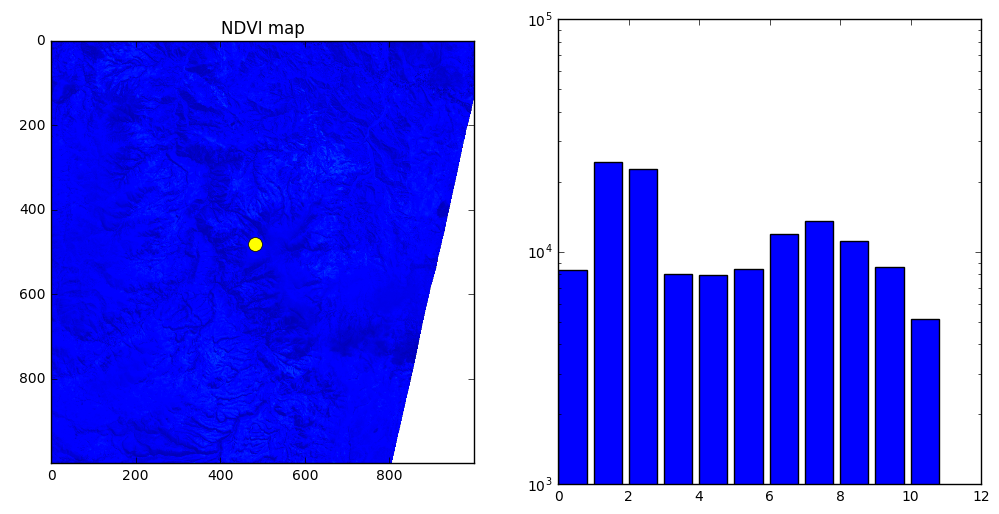

In [7]:
ndvi = ((arreglogrande[:,:,5]-arreglogrande[:,:,4])/(arreglogrande[:,:,4]+arreglogrande[:,:,5]))*100
def valor(x,y): return grafico(arreglogrande,ndvi,x,y)
widgets.interact(valor,x=(1,int(arreglogrande.shape[1]-1),20),y=(1,int(arreglogrande.shape[1]-1),20))